In [1]:
#for dataset
import pandas as pd
from scipy.stats import zscore
#for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
#for model training and splitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#for model evaluvation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
#checking for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
#checking for duplicates
df.duplicated().any()

False

In [9]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
# Calculate z-scores for each column using the zscore method
z_scores = zscore(df)
# Convert the result to a DataFrame for better visualization
z_scores_df = pd.DataFrame(z_scores, columns=df.columns)

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
threshold = 3
#Remove rows where any absolute z-score exceeds the threshold
filtered_df = df[(z_scores_df.abs() <=threshold).all(axis=1)]

In [14]:
filtered_df.shape

(198, 4)

In [15]:
filtered_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


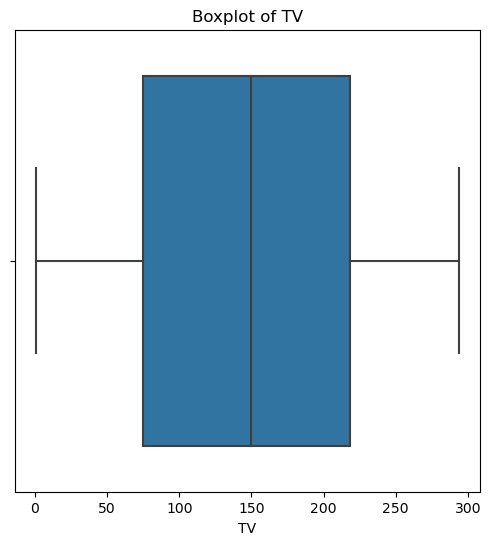

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(x=filtered_df.TV)
plt.title("Boxplot of TV")
plt.show()

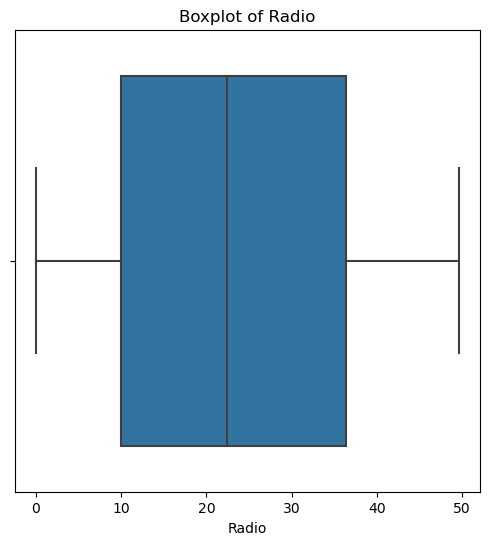

In [17]:
plt.figure(figsize=(6,6))
sns.boxplot(x=filtered_df.Radio)
plt.title("Boxplot of Radio")
plt.show()

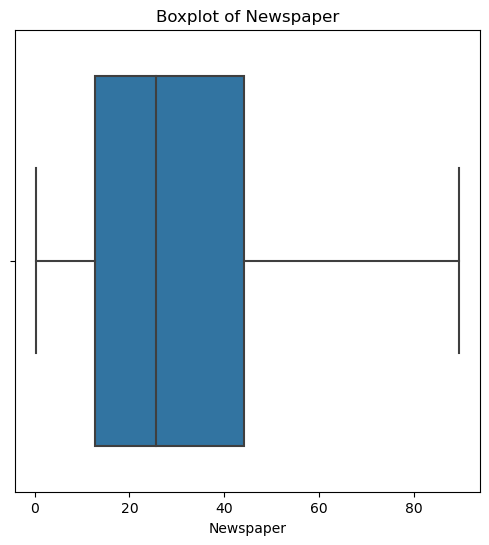

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(x=filtered_df.Newspaper)
plt.title("Boxplot of Newspaper")
plt.show()

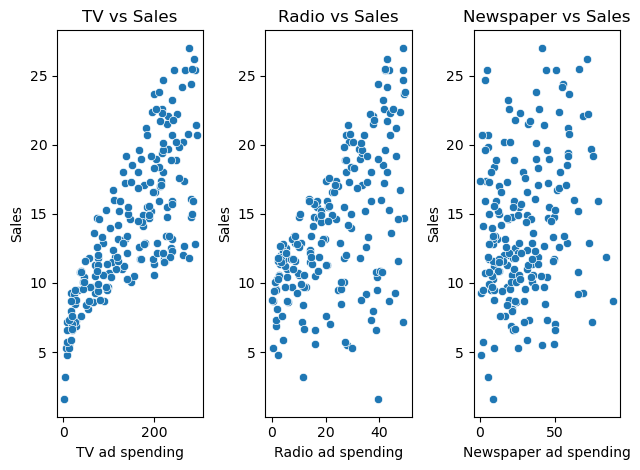

In [19]:
#creating a scatter plot to visualise how the dependent and independent variables are related
plt.subplot(1,3,1)
sns.scatterplot(x=filtered_df['TV'],y=filtered_df['Sales'])
plt.title("TV vs Sales")
plt.xlabel("TV ad spending")
plt.ylabel("Sales")

plt.subplot(1,3,2)
sns.scatterplot(x=filtered_df['Radio'],y=filtered_df['Sales'])
plt.title("Radio vs Sales")
plt.xlabel("Radio ad spending")
plt.ylabel("Sales")

plt.subplot(1,3,3)
sns.scatterplot(x=filtered_df['Newspaper'],y=filtered_df['Sales'])
plt.title("Newspaper vs Sales")
plt.xlabel("Newspaper ad spending")
plt.ylabel("Sales")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [20]:
x=filtered_df.iloc[:,0:3]
y=filtered_df.iloc[:,3:]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [21]:
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [22]:
ypred=regressor.predict(xtest)

In [23]:
r2Score=r2_score(ypred,ytest)
print(r2Score)

0.8980813271328868


In [24]:
mse = mean_squared_error(ytest, ypred)
print(mse)

2.432076682469544


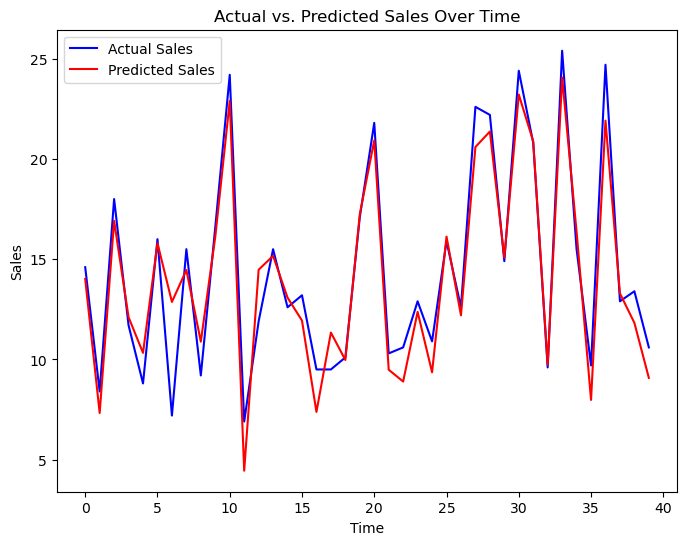

In [25]:
#Plot actual vs. predicted sales over time
plt.figure(figsize=(8, 6))
plt.plot(range(len(ytest)), ytest, color='blue', label='Actual Sales')
plt.plot(range(len(ypred)), ypred, color='red', label='Predicted Sales')
plt.title('Actual vs. Predicted Sales Over Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()